<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/401_%EC%97%B0%EC%86%8D%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

연속형 데이터 시각화
- 각 데이터의 크기순으로 전체적인 모양이나 분포,관계를 산점도나 히스토그램으로 시각화


1) 산점도
- n개의 짝으로 이루어진 자료(컬럼이 2개 이상)를 x,y축 평면에 점으로 나타내는 그래프
- 자료의 분포를 파악하는데 사용
- 주로 상관/회귀분석에 사용
plot(x축값, y축값, 옵션)
plot(y축값, 옵션) ==> x축값은 1~n으로 자동 지정

In [ ]:
# 한글사용 설정
install.packages('showtext')
library(showtext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Loading required package: sysfonts

Loading required package: showtextdb



In [ ]:
font_add_google('Nanum Gothic','ng')
showtext_auto()

In [ ]:
load("heights.rdata")

In [ ]:
heights

[1] 170 165 182 153 142 165 159 147 175 172

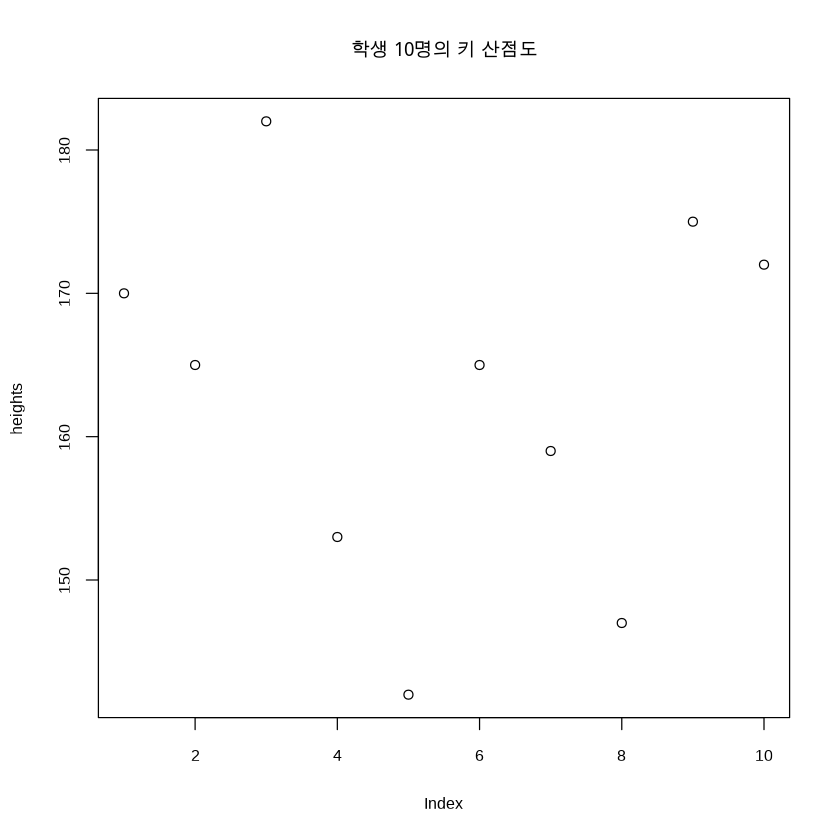

In [ ]:
plot(heights, main = "학생 10명의 키 산점도")
# y축값만 존재하는 경우 값의 크기를 시각화 --> 막대그래프로 표현하는 것이 좋을수 있음

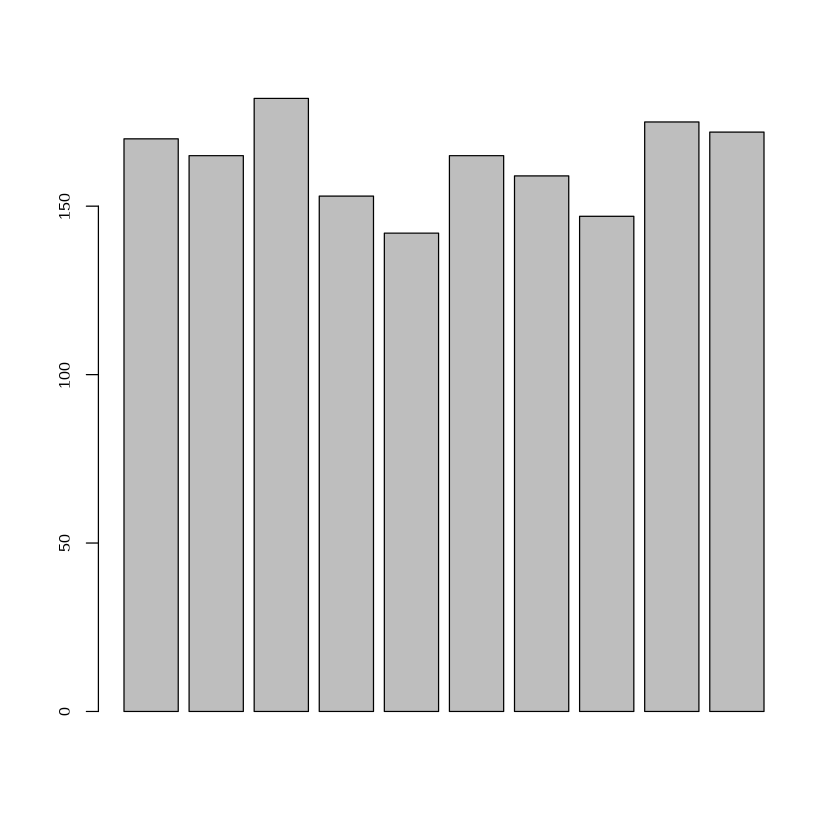

In [ ]:
barplot(heights)

그래프의 유형 : type
- p : point 점 (default)
- l : line  선
- b : both  점,선

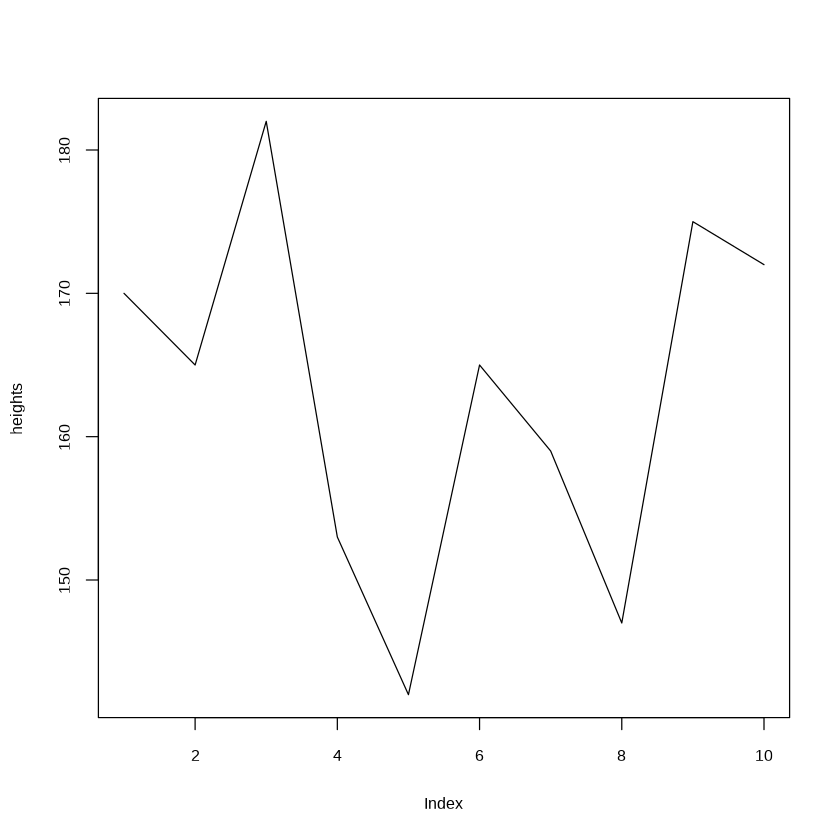

In [ ]:
plot(heights, type = 'l')

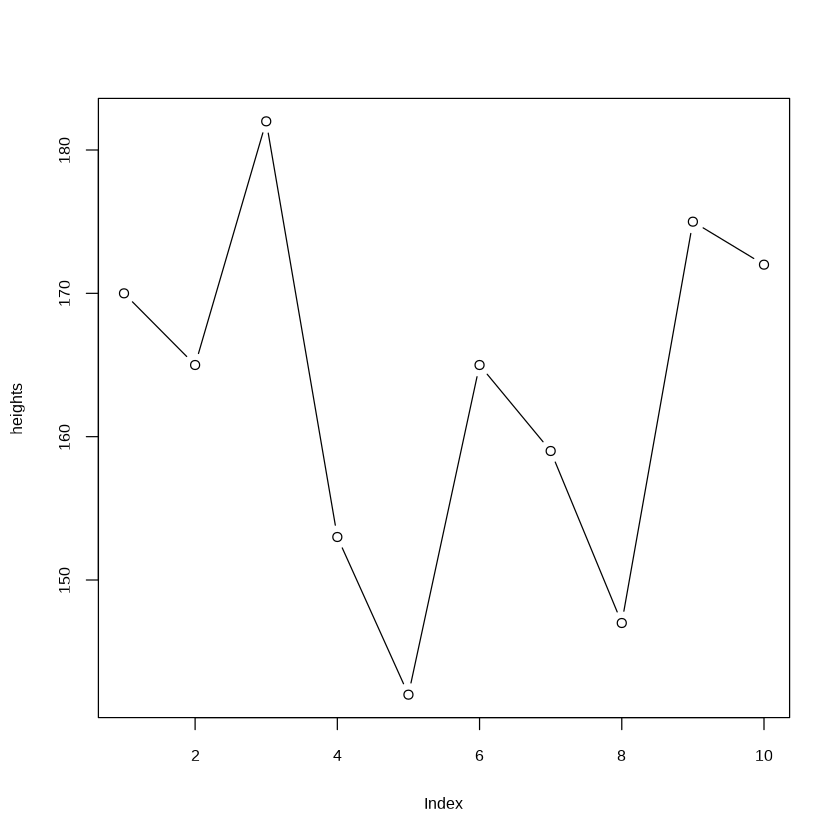

In [ ]:
plot(heights, type = 'b')

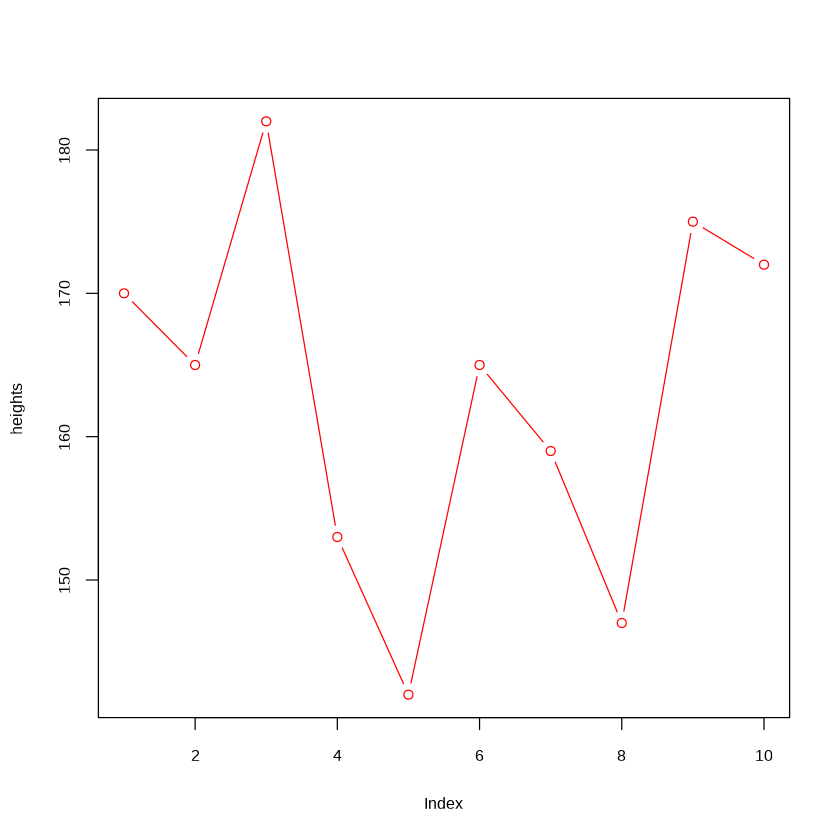

In [ ]:
plot(heights, type = 'b', col = 'red')

연습 : 신생아 월별 몸무계 추이
- x축 : 독립변수(입력값)
- y축 : 종속변수(결과값) <- 목표변수

In [ ]:
load("baby.rdata")
baby

age,weight
<dbl>,<dbl>
1,4.4
3,5.3
5,7.2
2,5.2
11,8.5
9,7.3
3,6.0
9,10.4
12,10.2


In [ ]:
summary(baby$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.400   5.475   6.650   7.060   8.200  10.400 

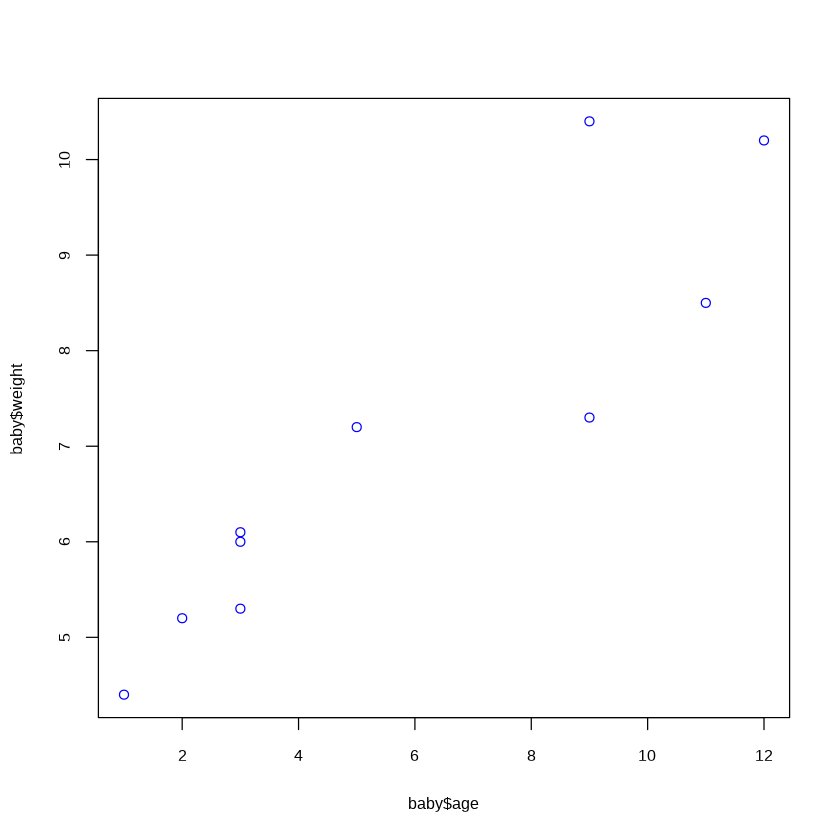

In [ ]:
plot(baby$age, baby$weight, col='blue')

plot(독립변수, 종속변수, col='blue') 
- 두변수의 관계(비례관계,반비례관계)를 알수 있음. < 상관분석 ~> 상관계수>
- 관계를 통해 규칙, 법칙을 유추<회귀방정식> ~> 새로운 x축값에 대한 y축값 예측 가능 < 회귀분석 >

In [ ]:
load("drugs.rdata")
drugs

age,drugA,drugB
<dbl>,<dbl>,<dbl>
23,16,15
30,20,18
40,27,25
45,40,31
60,60,40


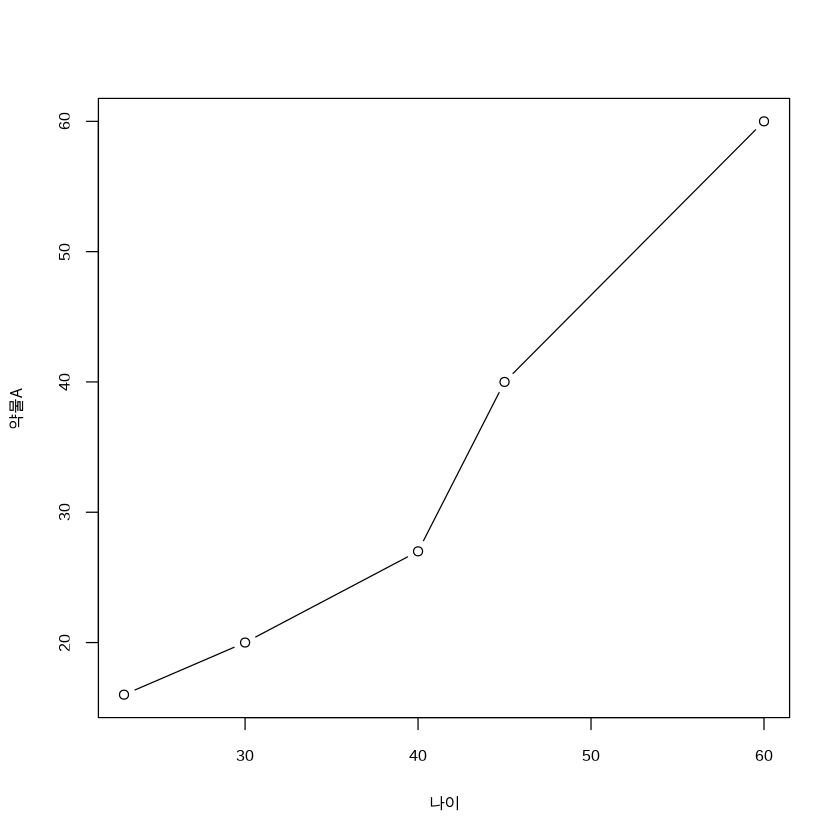

In [ ]:
plot(drugs$age, drugs$drugA, type = 'b', xlab = "나이", ylab = "약물A")

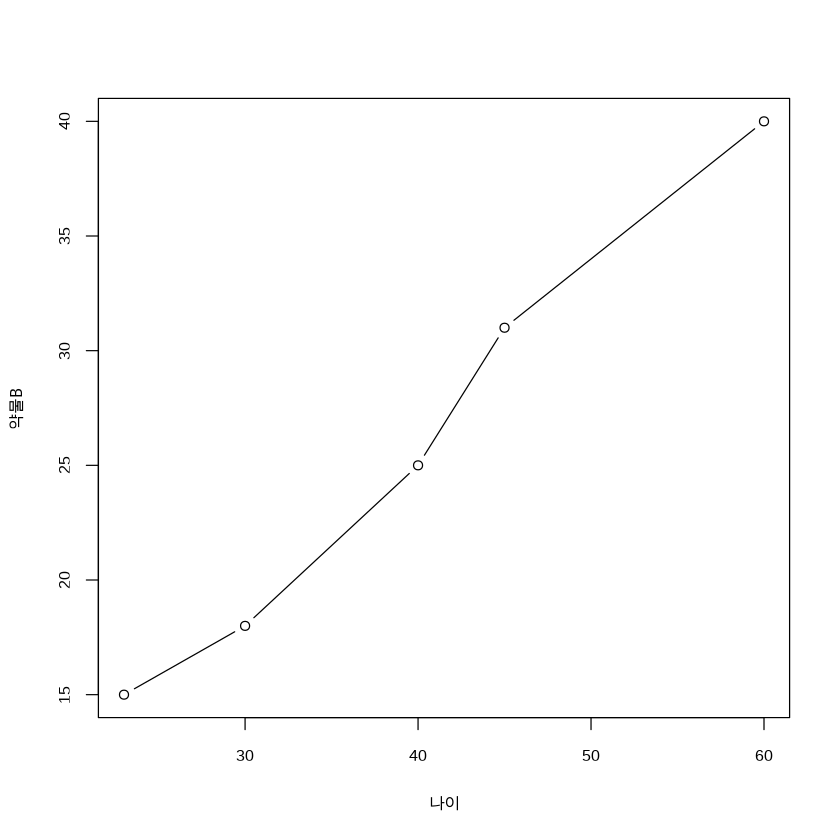

In [ ]:
plot(drugs$age, drugs$drugB, type = 'b', xlab = "나이", ylab = "약물B")

두개 그래프 함께 그리기

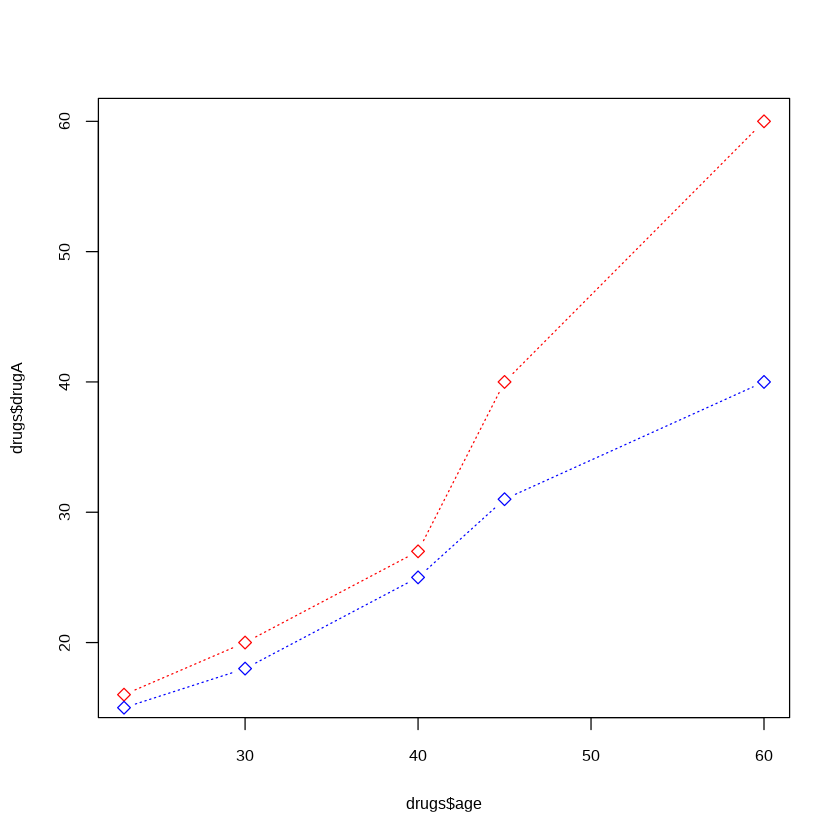

In [ ]:
plot(drugs$age, drugs$drugA, type = 'b', col='red', lty=3, pch=5)
lines(drugs$age, drugs$drugB, type = 'b', col='blue', lty=3, pch=5) # 추가된 그래프 추가시 lines()

In [ ]:
## ggplot으로 두변수 관계 비교
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



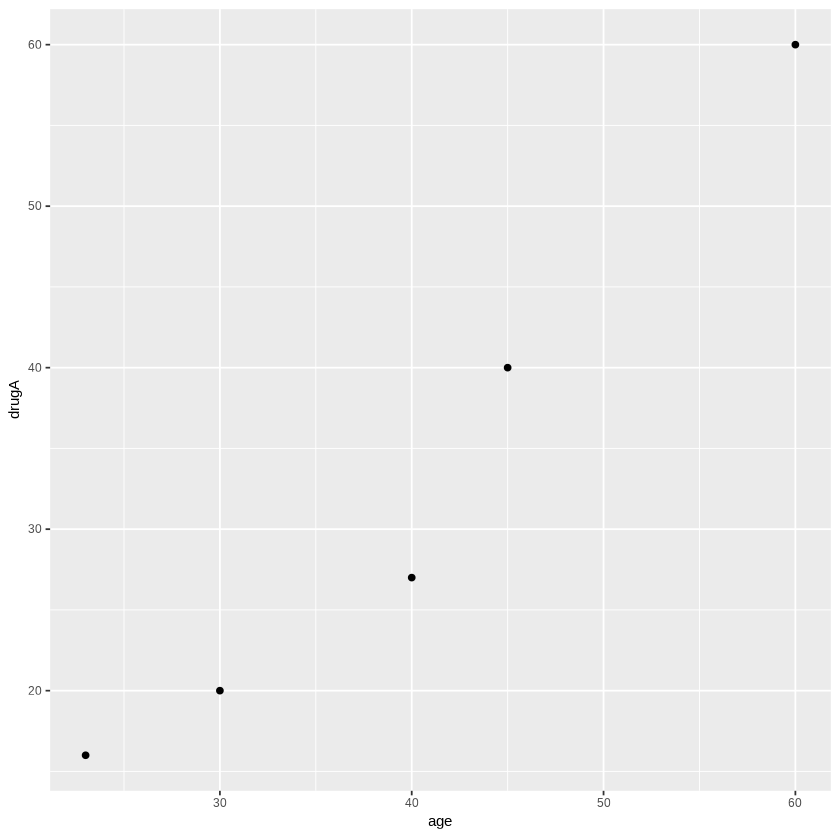

In [ ]:
p <- ggplot(drugs, aes(age,drugA))
p + geom_point()

(참고) 산점도의 점모양, 선유형 변경 : pch(0:25), lty(1:6)


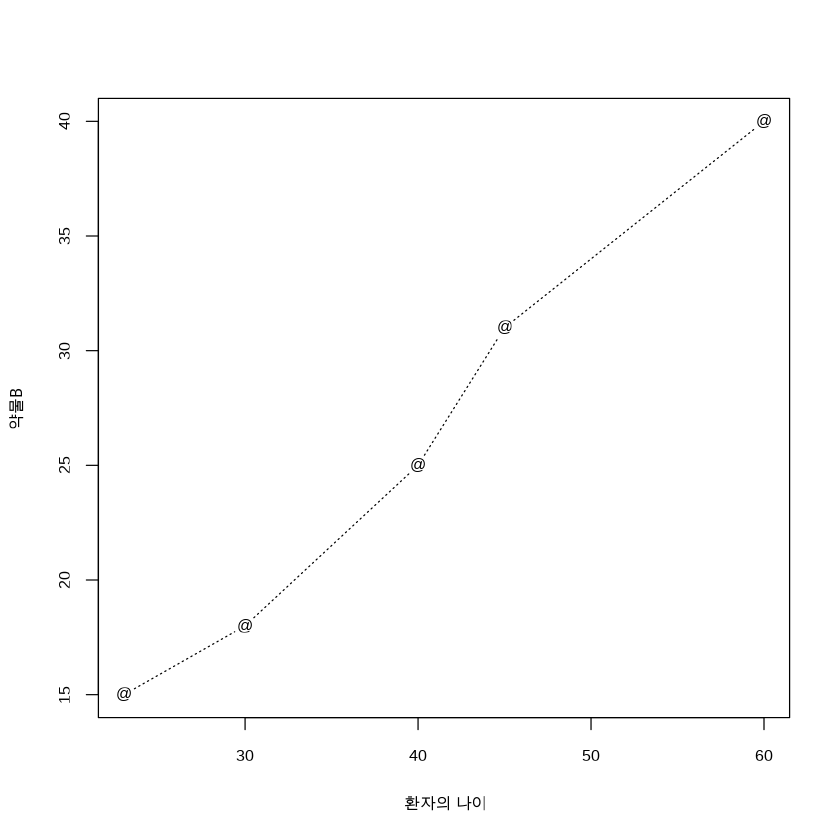

In [ ]:
plot(drugs$age, drugs$drugB, type="b", xlab = "환자의 나이", ylab = "약물B", pch = "@", lty = 3)

(참고) 산점도의 선두께 : lwd

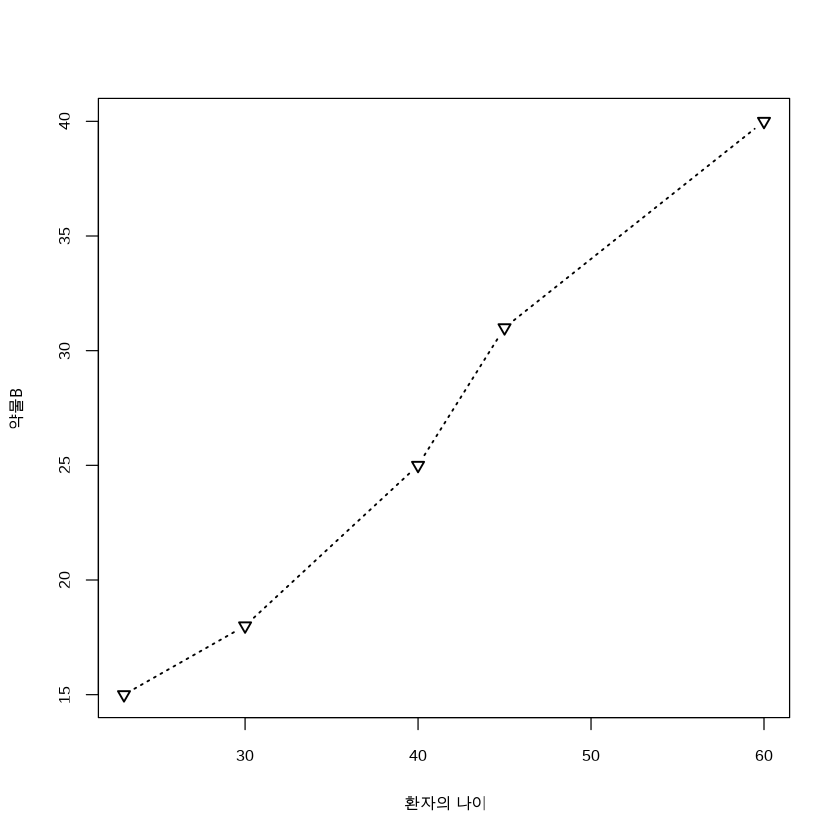

In [ ]:
plot(drugs$age, drugs$drugB, type="b", xlab = "환자의 나이", ylab = "약물B", pch = 25, lty = 3, lwd = 1.5)

그래프 축 세부 지정 : axis(x축/y축, 범위)

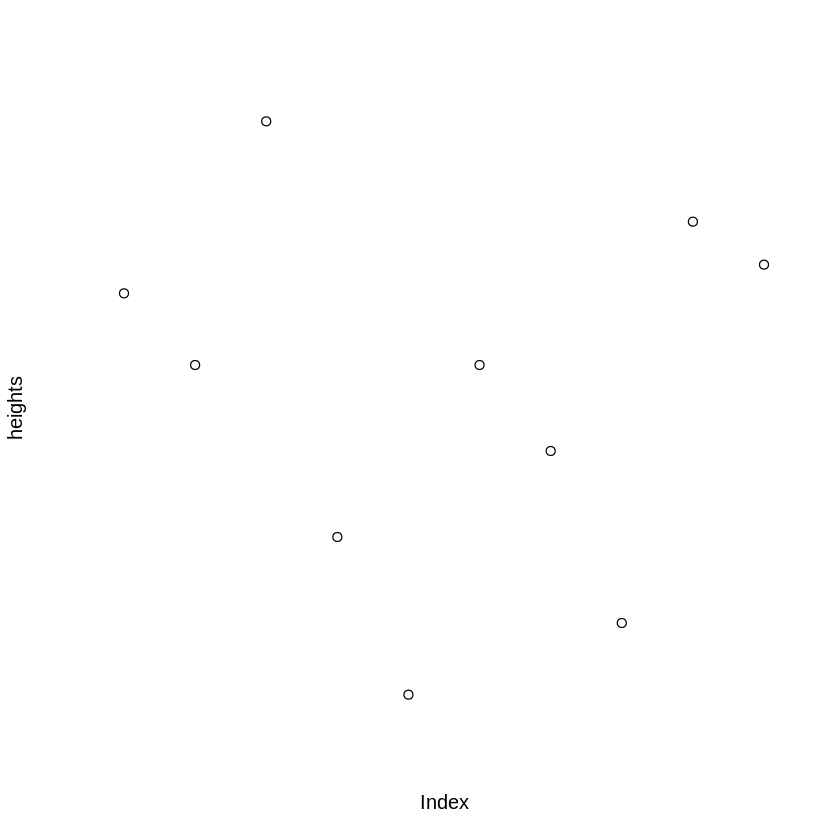

In [ ]:
plot(heights, axes = F) # 축은 빼고 그래프만 그림

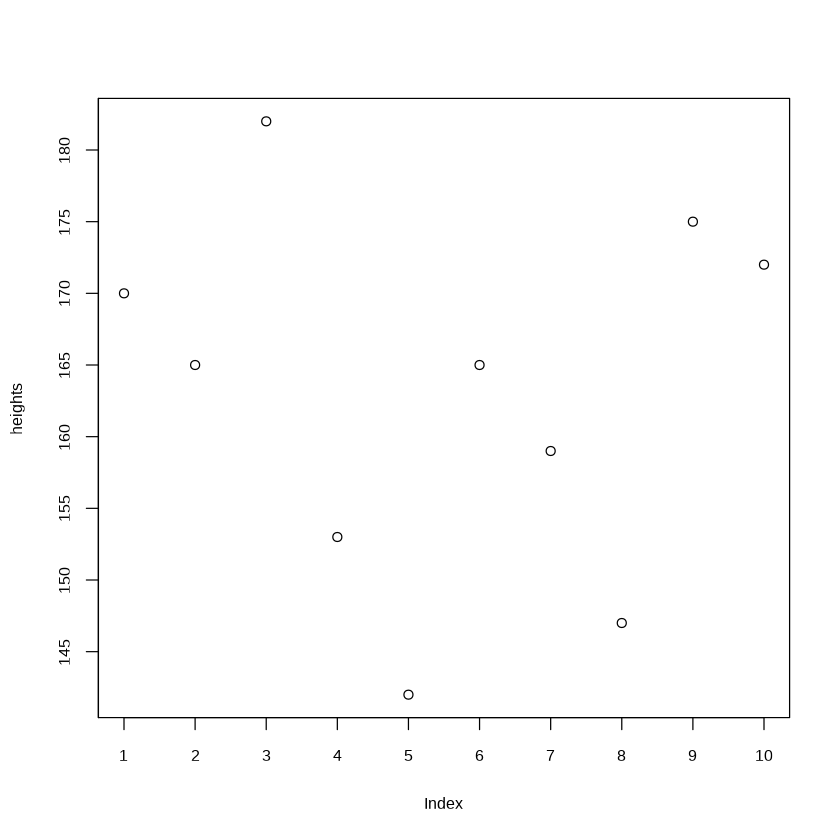

In [ ]:
plot(heights, axes = F) # 축은 빼고 그래프만 그림
axis(1, at=c(1:10)) # x 축 지정
axis(2, at=seq(140,185,5)) # y축 지정
box() # 그래프 박스 표시

각점에 수치 표시하기
text(값, 굵기, 표시문자, 위치)
- 위치지정1 : adj=c(x축방향, y축방향)
- 위치지정2 : pos=c(x축방향, y축방향), 1 ~ 4 (b/l/t/r)

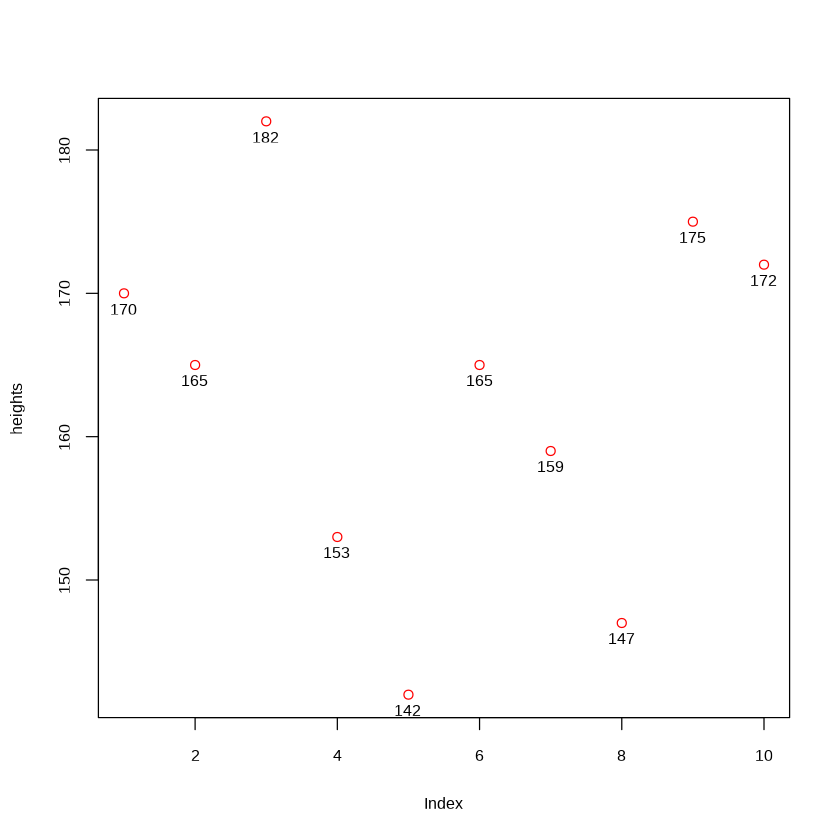

In [ ]:
plot(heights, col = "red")
text(heights, cex=1, lab=heights, pos=1)

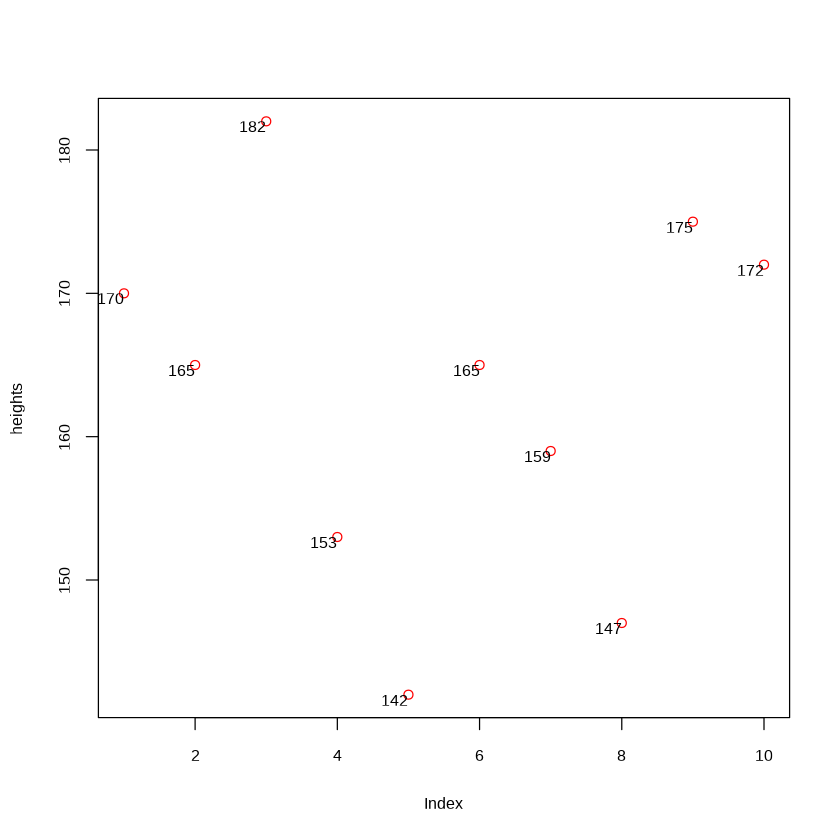

In [ ]:
plot(heights, col = "red")
text(heights, cex=1, lab=heights, adj=c(1,1))

고급 분석
- iris 의 독립변수 4개로 종속변수 품종 알아보기

In [ ]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


- 수치형 독립변수와 범주형 종속변수를 이용한 시각화

In [ ]:
# 붗꽃의 품종별로 그래프에 표시할 색상 지정
# Web Safe Colors Chart 참고 https://htmlcolorcodes.com/color-chart/
colors <- c('#00afbb','#e7b800','#fc4e07')
colors <- colors[as.numeric(iris$Species)] # 범주형 데이터를 숫차화

# 붗꽃의 품종별 그래프에 표시할 기호 지정
symbols <- c(16,17,18)
symbols <- symbols[as.numeric(iris$Species)]

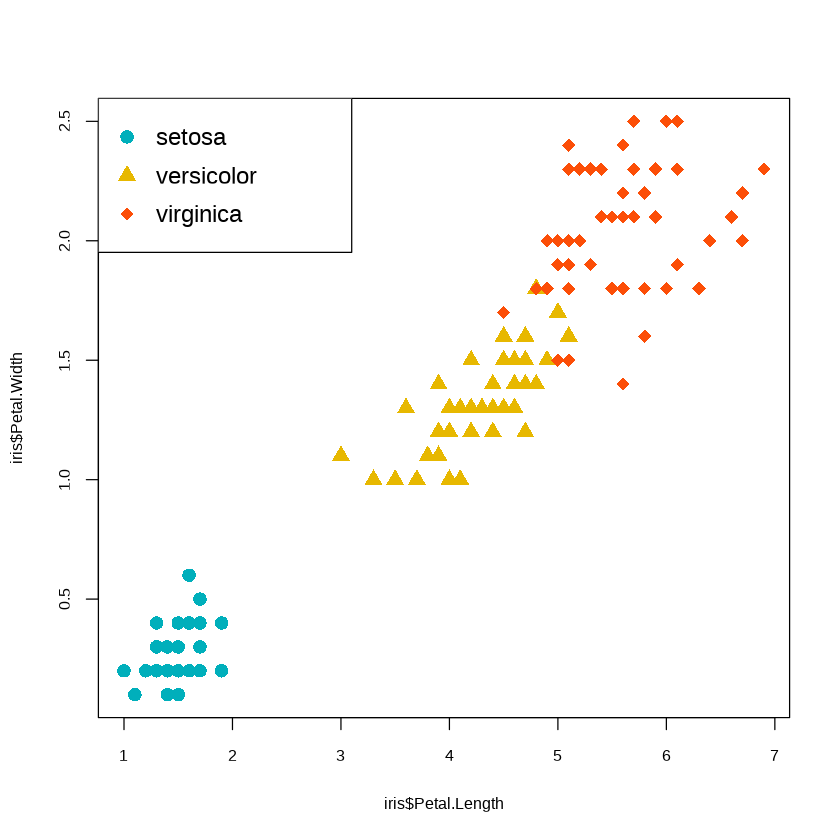

In [ ]:
plot(iris$Petal.Length, iris$Petal.Width, col = colors, pch=symbols, cex=1.5)
# 범례 추가
legend('topleft', legend = levels(iris$Species), pch = c(16,17,18), col = c('#00afbb','#e7b800','#fc4e07'), cex=1.5)

(실습) 리더십 데이터를 이용하여, 매니저의 나이와 국적을 산점도를 시각화

In [ ]:
load("leadership.rdata")
str(leadership)

'data.frame':	5 obs. of  10 variables:
 $ manager: int  1 2 3 4 5
 $ date   : Factor w/ 5 levels "05/01/14","10/01/14",..: 4 5 2 3 1
 $ country: Factor w/ 2 levels "UK","US": 2 2 1 1 1
 $ gender : Factor w/ 2 levels "F","M": 2 1 1 2 1
 $ age    : num  32 45 25 39 99
 $ q1     : num  5 3 3 3 2
 $ q2     : num  4 5 5 3 2
 $ q3     : num  5 2 5 4 1
 $ q4     : num  5 5 5 NA 2
 $ q5     : num  5 5 2 NA 1


manager,date,country,gender,age,q1,q2,q3,q4,q5,symbols,colors
<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,10/24/14,US,M,32,5,4,5,5,5,17,#e7b800
2,10/28/14,US,F,45,3,5,2,5,5,17,#e7b800
3,10/01/14,UK,F,25,3,5,5,5,2,16,#00afbb
4,10/12/14,UK,M,39,3,3,4,NA,NA,16,#00afbb
5,05/01/14,UK,F,99,2,2,1,2,1,16,#00afbb


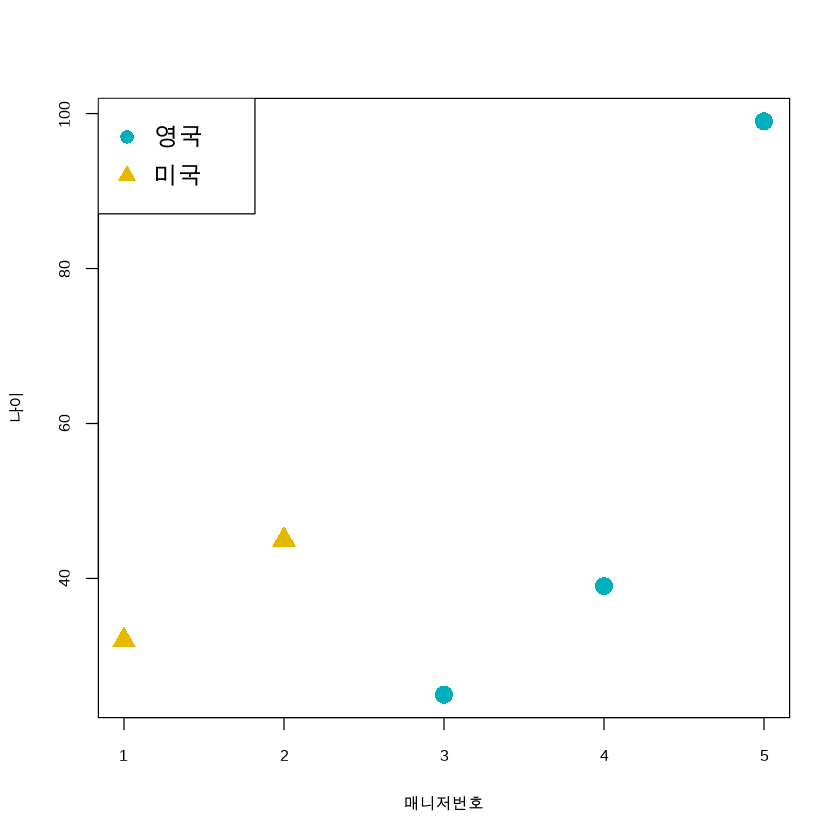

In [ ]:
# 범주형 데이터를 숫차화하여 색상과 심볼지정
within(leadership, {
  colors <- c('#00afbb','#e7b800')
  colors <- colors[as.numeric(country)] 
  symbols <- c(16,17)
  symbols <- symbols[as.numeric(country)]

  plot(manager,age, col = colors, pch=symbols, cex=2, xlab = "매니저번호", ylab = "나이" )
  # legend('topleft', legend = levels(country), pch = c(16,17), col = c('#00afbb','#e7b800'), cex=1.5)
  legend('topleft', legend = c("영국","미국"), pch = c(16,17), col = c('#00afbb','#e7b800'), cex=1.5)

})

그래프에 수직선 긋기 : abline
- h : horizental, 수평선
- v : vertical, 수직선



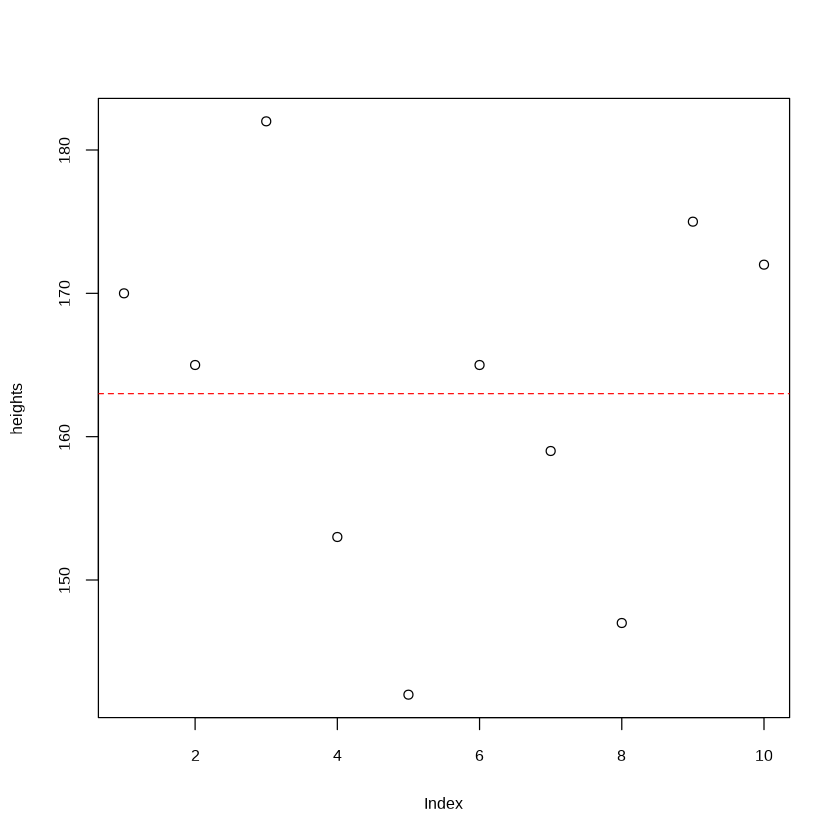

In [ ]:
# 학생 10명의 키 데이터에서 평균을 넘는 학생을 구별하는 선 추가?
plot(heights)
abline(h=mean(heights), col = "red", lty = 2)

In [ ]:
str(baby)

'data.frame':	10 obs. of  2 variables:
 $ age   : num  1 3 5 2 11 9 3 9 12 3
 $ weight: num  4.4 5.3 7.2 5.2 8.5 7.3 6 10.4 10.2 6.1


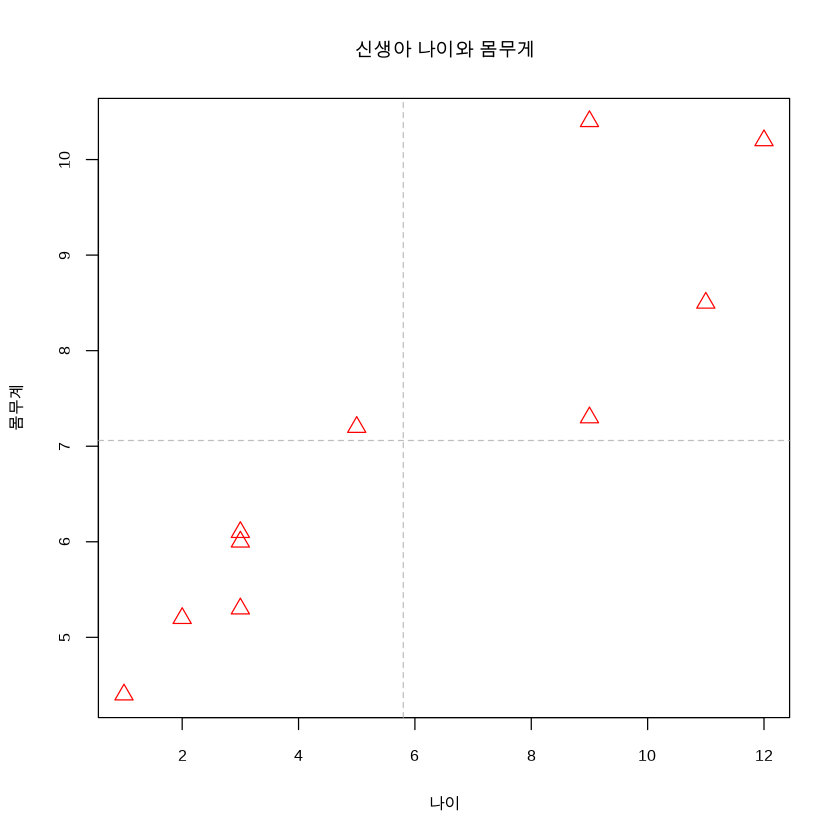

In [165]:
# 신생아 나이와 몸무게간의 어떤 관계가 있는지 알아보자
plot(baby, xlab = "나이", ylab = "몸무계", main = "신생아 나이와 몸무게",pch=2, col="red", cex = 1.5)
abline(v=mean(baby$age), col="gray", lty = 2, cex = 2)
abline(h=mean(baby$weight), col="gray", lty = 2, cex = 2)